__Hierarchical Clustering__

In [164]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

In [165]:
df = pd.read_csv('Country-data.csv')
df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [166]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [167]:
# Define a mapping from country to continent
country_to_continent = {
    'Afghanistan': 'Asia', 'Albania': 'Europe', 'Algeria': 'Africa', 'Angola': 'Africa',
    'Antigua and Barbuda': 'North America', 'Argentina': 'South America', 'Armenia': 'Asia',
    'Australia': 'Oceania', 'Austria': 'Europe', 'Azerbaijan': 'Asia', 'Bahamas': 'North America',
    'Bahrain': 'Asia', 'Bangladesh': 'Asia', 'Barbados': 'North America', 'Belarus': 'Europe',
    'Belgium': 'Europe', 'Belize': 'North America', 'Benin': 'Africa', 'Bhutan': 'Asia',
    'Bolivia': 'South America', 'Bosnia and Herzegovina': 'Europe', 'Botswana': 'Africa',
    'Brazil': 'South America', 'Brunei': 'Asia', 'Bulgaria': 'Europe', 'Burkina Faso': 'Africa',
    'Burundi': 'Africa', 'Cambodia': 'Asia', 'Cameroon': 'Africa', 'Canada': 'North America',
    'Cape Verde': 'Africa', 'Central African Republic': 'Africa', 'Chad': 'Africa', 'Chile': 'South America',
    'China': 'Asia', 'Colombia': 'South America', 'Comoros': 'Africa', 'Congo, Dem. Rep.': 'Africa',
    'Congo, Rep.': 'Africa', 'Costa Rica': 'North America', "Cote d'Ivoire": 'Africa', 'Croatia': 'Europe',
    'Cyprus': 'Asia', 'Czech Republic': 'Europe', 'Denmark': 'Europe', 'Dominican Republic': 'North America',
    'Ecuador': 'South America', 'Egypt': 'Africa', 'El Salvador': 'North America', 'Equatorial Guinea': 'Africa',
    'Eritrea': 'Africa', 'Estonia': 'Europe', 'Ethiopia': 'Africa', 'Fiji': 'Oceania', 'Finland': 'Europe',
    'France': 'Europe', 'Gabon': 'Africa', 'Gambia': 'Africa', 'Georgia': 'Asia', 'Germany': 'Europe',
    'Ghana': 'Africa', 'Greece': 'Europe', 'Grenada': 'North America', 'Guatemala': 'North America',
    'Guinea': 'Africa', 'Guinea-Bissau': 'Africa', 'Guyana': 'South America', 'Haiti': 'North America',
    'Honduras': 'North America', 'Hungary': 'Europe', 'Iceland': 'Europe', 'India': 'Asia', 'Indonesia': 'Asia',
    'Iran': 'Asia', 'Iraq': 'Asia', 'Ireland': 'Europe', 'Israel': 'Asia', 'Italy': 'Europe', 'Jamaica': 'North America',
    'Japan': 'Asia', 'Jordan': 'Asia', 'Kazakhstan': 'Asia', 'Kenya': 'Africa', 'Kiribati': 'Oceania',
    'Kuwait': 'Asia', 'Kyrgyz Republic': 'Asia', 'Laos': 'Asia', 'Latvia': 'Europe', 'Lebanon': 'Asia',
    'Lesotho': 'Africa', 'Liberia': 'Africa', 'Libya': 'Africa', 'Lithuania': 'Europe', 'Luxembourg': 'Europe',
    'Macedonia, FYR': 'Europe', 'Madagascar': 'Africa', 'Malawi': 'Africa', 'Malaysia': 'Asia', 'Maldives': 'Asia',
    'Mali': 'Africa', 'Malta': 'Europe', 'Mauritania': 'Africa', 'Mauritius': 'Africa', 'Mexico': 'North America',
    'Moldova': 'Europe', 'Mongolia': 'Asia', 'Montenegro': 'Europe', 'Morocco': 'Africa', 'Mozambique': 'Africa',
    'Myanmar': 'Asia', 'Namibia': 'Africa', 'Nepal': 'Asia', 'Netherlands': 'Europe', 'New Zealand': 'Oceania',
    'Nicaragua': 'North America', 'Niger': 'Africa', 'Nigeria': 'Africa', 'Norway': 'Europe', 'Oman': 'Asia',
    'Pakistan': 'Asia', 'Panama': 'North America', 'Papua New Guinea': 'Oceania', 'Paraguay': 'South America',
    'Peru': 'South America', 'Philippines': 'Asia', 'Poland': 'Europe', 'Portugal': 'Europe', 'Qatar': 'Asia',
    'Romania': 'Europe', 'Russia': 'Europe', 'Rwanda': 'Africa', 'Samoa': 'Oceania', 'Saudi Arabia': 'Asia',
    'Senegal': 'Africa', 'Serbia': 'Europe', 'Seychelles': 'Africa', 'Sierra Leone': 'Africa', 'Singapore': 'Asia',
    'Slovak Republic': 'Europe', 'Slovenia': 'Europe', 'Solomon Islands': 'Oceania', 'South Africa': 'Africa',
    'South Korea': 'Asia', 'Spain': 'Europe', 'Sri Lanka': 'Asia', 'St. Vincent and the Grenadines': 'North America',
    'Sudan': 'Africa', 'Suriname': 'South America', 'Sweden': 'Europe', 'Switzerland': 'Europe', 'Tajikistan': 'Asia',
    'Tanzania': 'Africa', 'Thailand': 'Asia', 'Timor-Leste': 'Asia', 'Togo': 'Africa', 'Tonga': 'Oceania',
    'Tunisia': 'Africa', 'Turkey': 'Asia', 'Turkmenistan': 'Asia', 'Uganda': 'Africa', 'Ukraine': 'Europe',
    'United Arab Emirates': 'Asia', 'United Kingdom': 'Europe', 'United States': 'North America', 'Uruguay': 'South America',
    'Uzbekistan': 'Asia', 'Vanuatu': 'Oceania', 'Venezuela': 'South America', 'Vietnam': 'Asia', 'Yemen': 'Asia',
    'Zambia': 'Africa'
}

# Add the continent column to df
df['continent'] = df['country'].map(country_to_continent)

df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,continent
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,Asia
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,Europe
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,Africa
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,Africa
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,North America


In [169]:
# save to excel
df.to_csv('olympics_medal_clustering.csv', index=False)

In [ ]:
# number of countries by continent
df['continent'].value_counts()

continent
Africa           47
Asia             44
Europe           39
North America    15
South America    12
Oceania           8
Name: count, dtype: int64

In [ ]:
# define samples
data = df.drop(['country', 'continent'], axis=1)
team_continent = df['continent']

In [ ]:
normalizer = Normalizer()
kmeans = KMeans(n_clusters = 3, random_state=42)

pipeline = make_pipeline(normalizer, kmeans)

cluster_scaled = pipeline.fit_predict(data)


# add cluster to the dataframe
df['cluster'] = cluster_scaled

df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,continent,cluster
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,Asia,0
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,Europe,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,Africa,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,Africa,2
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,North America,2


In [ ]:
# Create dataframe for cluster and levels
cluster_continent = pd.DataFrame({'cluster': df['cluster'], 'country':df['continent']})
cluster_continent.head()


,cluster,country
0,0,Asia
1,0,Europe
2,0,Africa
3,2,Africa
4,2,North America


In [ ]:
# cross tabulate the dataframe
ct = pd.crosstab(df['cluster'], df['continent'])
ct

continent,Africa,Asia,Europe,North America,Oceania,South America
cluster,,,,,,
0,35,31,11,4,0,2
1,0,4,18,4,4,0
2,12,9,10,7,4,10


Agglomerative Hierarchical clustering

In [ ]:
# define samples
df_numerical = df.drop(['country', 'continent'], axis=1)
team = df['country']

In [ ]:
# define mergings
mergings = linkage(df_numerical, method='complete')

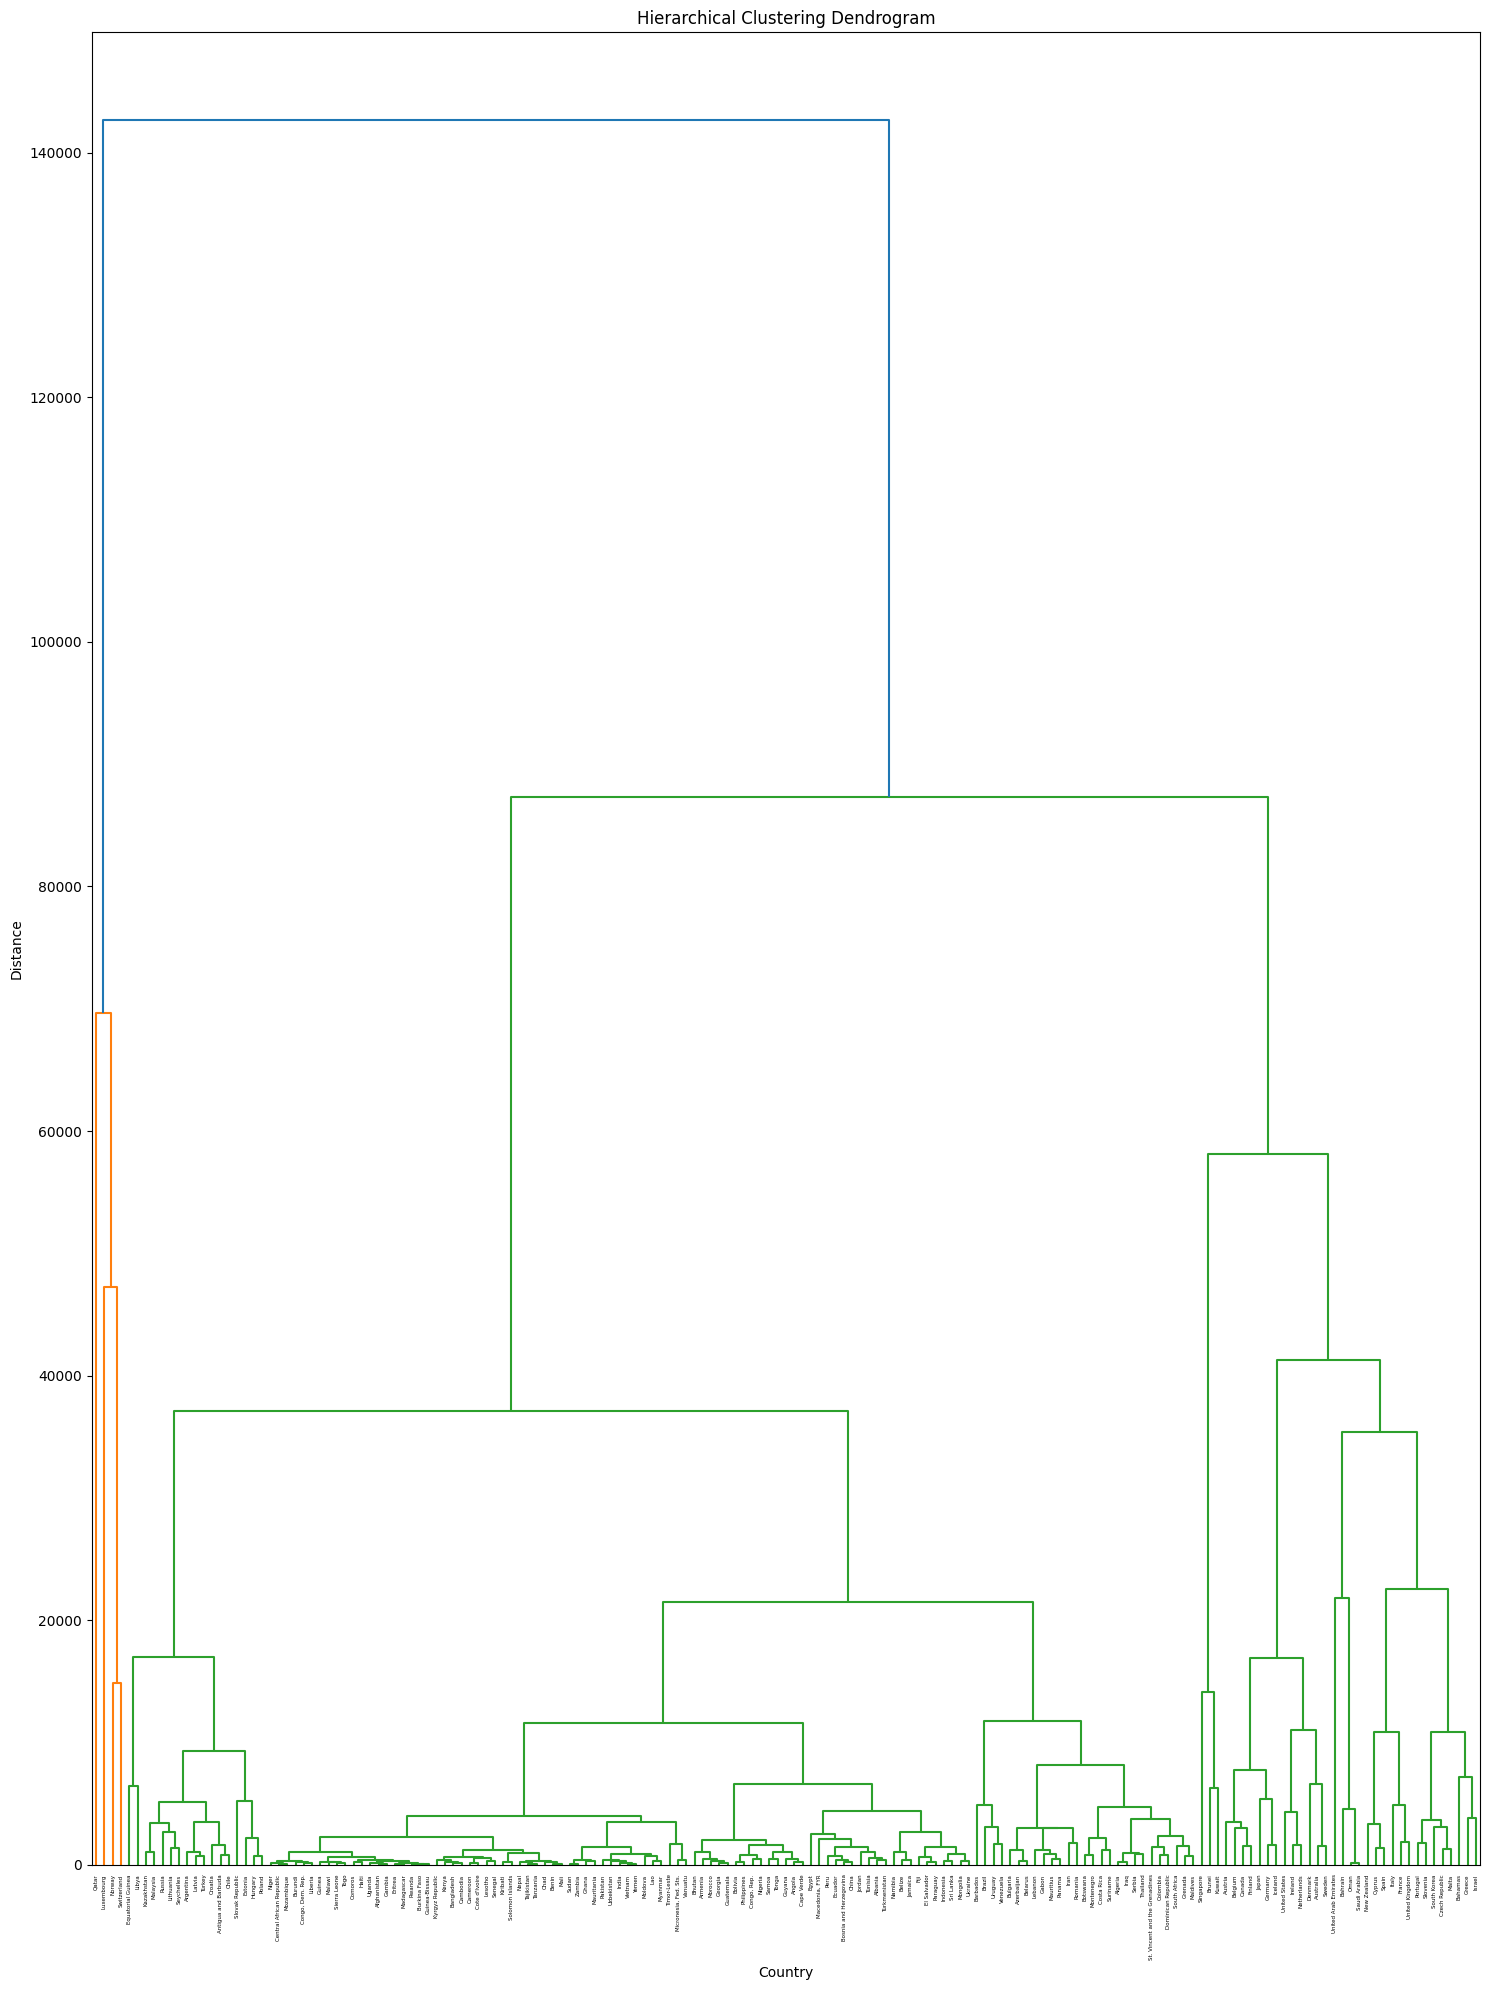

In [ ]:
plt.figure(figsize=(15, 20))
dendrogram(mergings, labels=team.values, leaf_rotation=90, leaf_font_size=4)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Country')
plt.ylabel('Distance')
plt.tight_layout()
plt.show()

Cluster Labels

In [ ]:
# define clusters labels
labels = fcluster(mergings, 40000, criterion='distance')
labels

array([4, 4, 4, 4, 4, 4, 4, 6, 6, 4, 7, 7, 4, 4, 4, 6, 4, 4, 4, 4, 4, 4,
       4, 5, 4, 4, 4, 4, 4, 6, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 7, 7,
       6, 4, 4, 4, 4, 4, 4, 4, 4, 6, 7, 4, 4, 4, 6, 4, 7, 4, 4, 4, 4, 4,
       4, 4, 6, 4, 4, 4, 4, 6, 7, 7, 4, 6, 4, 4, 4, 4, 5, 4, 4, 4, 4, 4,
       4, 4, 4, 2, 4, 4, 4, 4, 4, 4, 7, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       6, 7, 4, 4, 1, 7, 4, 4, 4, 4, 4, 4, 7, 3, 4, 4, 4, 4, 7, 4, 4, 4,
       4, 5, 4, 7, 4, 4, 7, 7, 4, 4, 4, 4, 6, 1, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 7, 7, 6, 4, 4, 4, 4, 4, 4, 4], dtype=int32)

In [ ]:
# pair country to labels using dataframe
country_labels = pd.DataFrame({'country': team, 'labels': labels})
print(country_labels.sort_values('labels'))

                 country  labels
114               Norway       1
145          Switzerland       1
91            Luxembourg       2
123                Qatar       3
4    Antigua and Barbuda       4
..                   ...     ...
158       United Kingdom       7
138          South Korea       7
135             Slovenia       7
128         Saudi Arabia       7
139                Spain       7

[167 rows x 2 columns]


In [ ]:
ct_labels = pd.crosstab(country_labels['labels'], country_labels['country'])
ct_labels

country,Afghanistan,Albania,Algeria,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,Azerbaijan,...,United Arab Emirates,United Kingdom,United States,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,Yemen,Zambia
labels,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,1,1,1,1,0,0,1,...,0,0,0,1,1,1,1,1,1,1
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,1,1,0,...,0,0,1,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0
